In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import sqlite3

### This creates an sqlite engine and connects it to the database the we are goijng to use

In [3]:
conn = sqlite3.connect(r'C:\Users\THIS PC\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\New Projects\Zomato\zomato_rawdata.sqlite')

### This reads all the rows from the Users table in the zomato database

In [4]:
pd.read_sql_query("SELECT * FROM USERS", con=conn).head()

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### This stores the collected raw data in the dataframe df

In [5]:
df = pd.read_sql_query("SELECT * FROM USERS", con=conn)

### This shows thata there are 51717 rows and 18 columns in the zomato dataframe

In [6]:
df.shape

(51717, 18)

In [7]:
df.head()

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### This shows the number missing values in the the zomato dataframe

In [8]:
df.isna().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

### This shows that for the rate column there are 15% missing values, for the dish_liked column there is 54% missing data

In [9]:
(df.isna().sum() / len(df)) * 100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

### This returns the data types of the various columns in the dataframe

In [10]:
df.dtypes

index                           int64
url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

### This returns the rate column

In [11]:
df.rate

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713      None
51714      None
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 51717, dtype: object

### This returns the distinct values in the rate column

In [12]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

### This replaces the NEW and - values in the rate column with nan ie missing values

In [13]:
df.replace(['NEW', '-'], np.nan, inplace=True)

### This returns the distinct values in the rate column

In [14]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

### This splits the values of each row into a list and takes the first element and changes it to a float datatype

In [15]:
df['rate'] = df.rate.apply(lambda x : float(x.split('/')[0]) if type(x) == str else x)

In [16]:
df.rate

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

### This creates a pivot table of index rate and the column being oline_order

In [17]:
pd.crosstab(index=df.rate, columns=df.online_order)

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


### This is another way to get a similar data as that of pandas crosstab function

In [23]:
df.groupby(['rate', 'online_order'],level=)['url'].count()

rate  online_order
1.8   No                 5
2.0   No                11
2.1   No                 9
      Yes               15
2.2   No                10
      Yes               16
2.3   No                29
      Yes               22
2.4   No                36
      Yes               34
2.5   No                38
      Yes               63
2.6   No                83
      Yes              177
2.7   No               141
      Yes              166
2.8   No               224
      Yes              376
2.9   No               314
      Yes              488
3.0   No               439
      Yes              584
3.1   No               587
      Yes              974
3.2   No               829
      Yes             1044
3.3   No              1137
      Yes             1173
3.4   No              1024
      Yes             1452
3.5   No              1090
      Yes             1694
3.6   No              1090
      Yes             2226
3.7   No              1172
      Yes             2649
3.8   No 

### This stores the crosstab returns in a variable

In [18]:
rate_df = pd.crosstab(index=df.rate, columns=df.online_order)

### This creates a stacked bar graph using the pivot table

<AxesSubplot: xlabel='rate'>

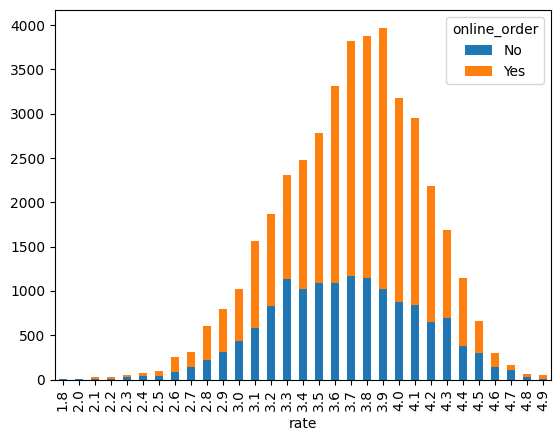

In [19]:
rate_df.plot(kind='bar', stacked=True)

### This normalizes the data ie for every row we find the respsctive percentage for the no and yes values

In [31]:
normalized_rate = rate_df.div(rate_df.sum(axis=1).astype('float'), axis=0) * 100

In [32]:
normalized_rate

online_order,No,Yes
rate,,
1.8,100.000000,0.000000
2.0,100.000000,0.000000
2.1,37.500000,62.500000
2.2,38.461538,61.538462
2.3,56.862745,43.137255
2.4,51.428571,48.571429
2.5,37.623762,62.376238
2.6,31.923077,68.076923
2.7,45.928339,54.071661


### A stacked bar graph is created for the normalized rate dataframe

<AxesSubplot: xlabel='rate'>

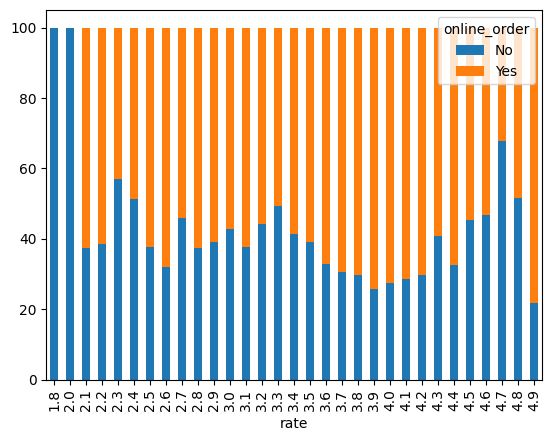

In [33]:
normalized_rate.plot(kind='bar', stacked=True)

### This displays all the distinct values in the rest type column

In [35]:
df.rest_type.unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', None, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
     

### This drops all missing values in the rest type column and stores it in the df_rest variable

In [38]:
df_rest = df.dropna(subset='rest_type')

### This confirms whether the drop if the missing values was successful or not and in this case it was successful

In [40]:
df_rest.rest_type.isna().sum()

0

### This gets all the rows with Quick Biites str in them and stores them in a new variable quick_bites

In [69]:
quick_bites= df_rest[df_rest.rest_type.str.contains('Quick Bites')]

### This shows that there are 20639 rows and 18 columns of data with the sting Quick Bites in it

In [70]:
quick_bites.shape

(20639, 18)

In [71]:
quick_bites.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [47]:
from nltk import RegexpTokenizer

### This creates a instance for the RegexpTokenizer imported from nltk package

In [48]:
tokenizer = RegexpTokenizer(pattern='[a-zA-Z]+')

In [49]:
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [72]:
quick_bites['reviews_list']

3        [('Rated 4.0', "RATED\n  Great food and proper...
23       [('Rated 4.0', "RATED\n  So, went here with fr...
26       [('Rated 5.0', 'RATED\n  please provide some e...
31       [('Rated 1.0', "RATED\n  Worst restaurant ever...
34       [('Rated 3.0', 'RATED\n  Not worth for the mon...
                               ...                        
51641    [('Rated 2.0', "RATED\n  Food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('Rated 5.0', "RATED\n  I was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

### This converts each row in the reviews_list column to lower case 

In [73]:
quick_bites['reviews_list_lower'] = quick_bites['reviews_list'].apply(lambda x : x.lower())

C:\Users\THIS PC\AppData\Local\Temp\ipykernel_1204\3202919447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_bites['reviews_list_lower'] = quick_bites['reviews_list'].apply(lambda x : x.lower())


### This applies the tokenizer to the 3rd row of the data frame 

In [74]:
tokenizer.tokenize(quick_bites['reviews_list'][3])

['Rated',
 'RATED',
 'n',
 'Great',
 'food',
 'and',
 'proper',
 'Karnataka',
 'style',
 'full',
 'meals',
 'Been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'Will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'Rated',
 'RATED',
 'n',
 'Reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'Saturday',
 'Half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'What',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'The',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'Only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'There',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'The',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'Had',
 'to',
 'call',
 'them',
 'repeatedly',
 'Rated',
 'RATED',
 'n',
 'Had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

### This generates the tokens of all the rows using the RegexpTokenizer package from nltk and stores it in a new variable

In [75]:
reviews_tokens = quick_bites['reviews_list'].apply(tokenizer.tokenize)

In [76]:
reviews_tokens

3        [Rated, RATED, n, Great, food, and, proper, Ka...
23       [Rated, RATED, n, So, went, here, with, friend...
26       [Rated, RATED, n, please, provide, some, extra...
31       [Rated, RATED, n, Worst, restaurant, ever, Veg...
34       [Rated, RATED, n, Not, worth, for, the, money,...
                               ...                        
51641    [Rated, RATED, n, Food, is, not, upto, the, ma...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [Rated, RATED, n, I, was, randomly, looking, o...
Name: reviews_list, Length: 20639, dtype: object

In [58]:
from nltk.corpus import stopwords

In [62]:
import nltk

In [63]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\THIS
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

### This displays a set of stopwords from the nltk package 

In [64]:
stop = stopwords.words('english')

In [66]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### This adds additional stopwords to the already existing st of stopwords

In [67]:
stop.extend(['rated', 'n', 'nan', 'Rated', 'RATED', 'x'])

In [68]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [77]:
rv3 = reviews_tokens[3]

In [78]:
print(rv3)

['Rated', 'RATED', 'n', 'Great', 'food', 'and', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'there', 'twice', 'and', 'was', 'fully', 'satisfied', 'Will', 'give', 'stars', 'if', 'it', 's', 'well', 'managed', 'Rated', 'RATED', 'n', 'Reached', 'the', 'place', 'at', 'pm', 'on', 'Saturday', 'Half', 'of', 'the', 'items', 'on', 'the', 'menu', 'were', 'over', 'What', 'was', 'annoying', 'was', 'is', 'the', 'food', 'was', 'cold', 'The', 'taste', 'was', 'also', 'very', 'average', 'Only', 'dosa', 'and', 'holige', 'were', 'good', 'There', 'were', 'very', 'few', 'people', 'in', 'the', 'restaurant', 'and', 'the', 'service', 'was', 'still', 'very', 'slow', 'The', 'waiters', 'were', 'all', 'standing', 'in', 'one', 'corner', 'and', 'talking', 'Had', 'to', 'call', 'them', 'repeatedly', 'Rated', 'RATED', 'n', 'Had', 'been', 'here', 'good', 'food', 'served', 'and', 'tasty', 'good', 'place', 'to', 'go', 'with', 'freinds', 'and', 'family', 'should', 'be', 'first', 'to', 'get', 'served', 'well', 

In [79]:
[x for x in rv3 if x not in stop]

['Great',
 'food',
 'proper',
 'Karnataka',
 'style',
 'full',
 'meals',
 'Been',
 'twice',
 'fully',
 'satisfied',
 'Will',
 'give',
 'stars',
 'well',
 'managed',
 'Reached',
 'place',
 'pm',
 'Saturday',
 'Half',
 'items',
 'menu',
 'What',
 'annoying',
 'food',
 'cold',
 'The',
 'taste',
 'also',
 'average',
 'Only',
 'dosa',
 'holige',
 'good',
 'There',
 'people',
 'restaurant',
 'service',
 'still',
 'slow',
 'The',
 'waiters',
 'standing',
 'one',
 'corner',
 'talking',
 'Had',
 'call',
 'repeatedly',
 'Had',
 'good',
 'food',
 'served',
 'tasty',
 'good',
 'place',
 'go',
 'freinds',
 'family',
 'first',
 'get',
 'served',
 'well',
 'food',
 'One',
 'good',
 'hotel',
 'price',
 'How',
 'Udupi',
 'restaurant',
 'dirty',
 'floor',
 'walls',
 'waiters',
 'stained',
 'food',
 'Why',
 'cant',
 'clean',
 'The',
 'floor',
 'even',
 'decorative',
 'colour',
 'paper',
 'every',
 'lot',
 'food',
 'Now',
 'coming',
 'taste',
 'food',
 'pretty',
 'decent',
 'chargw',
 'What',
 'upset',
 '

### This removes all the stopwords from the rviews tokens 

In [82]:
reviews_tokens_clean = reviews_tokens.apply(lambda each_review : [token for token in each_review if token not in stop])

In [87]:
reviews_tokens_clean

3        [Great, food, proper, Karnataka, style, full, ...
23       [So, went, friends, tea, The, ambience, striki...
26       [please, provide, extra, sambal, quantity, les...
31       [Worst, restaurant, ever, Veg, Manchurian, wor...
34       [Not, worth, money, pay, ambience, good, enoug...
                               ...                        
51641    [Food, upto, mark, nQuantity, food, little, nC...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [I, randomly, looking, Zomato, burger, I, show...
Name: reviews_list, Length: 20639, dtype: object

### This turns the reviews_tokens_clean into a 1  D list

In [88]:
review_1D = []
for review in reviews_tokens_clean:
    for word in review:
        review_1D.append(word)

In [89]:
review_1D

['Great',
 'food',
 'proper',
 'Karnataka',
 'style',
 'full',
 'meals',
 'Been',
 'twice',
 'fully',
 'satisfied',
 'Will',
 'give',
 'stars',
 'well',
 'managed',
 'Reached',
 'place',
 'pm',
 'Saturday',
 'Half',
 'items',
 'menu',
 'What',
 'annoying',
 'food',
 'cold',
 'The',
 'taste',
 'also',
 'average',
 'Only',
 'dosa',
 'holige',
 'good',
 'There',
 'people',
 'restaurant',
 'service',
 'still',
 'slow',
 'The',
 'waiters',
 'standing',
 'one',
 'corner',
 'talking',
 'Had',
 'call',
 'repeatedly',
 'Had',
 'good',
 'food',
 'served',
 'tasty',
 'good',
 'place',
 'go',
 'freinds',
 'family',
 'first',
 'get',
 'served',
 'well',
 'food',
 'One',
 'good',
 'hotel',
 'price',
 'How',
 'Udupi',
 'restaurant',
 'dirty',
 'floor',
 'walls',
 'waiters',
 'stained',
 'food',
 'Why',
 'cant',
 'clean',
 'The',
 'floor',
 'even',
 'decorative',
 'colour',
 'paper',
 'every',
 'lot',
 'food',
 'Now',
 'coming',
 'taste',
 'food',
 'pretty',
 'decent',
 'chargw',
 'What',
 'upset',
 '

In [84]:
from collections import Counter

## Unigram Analysis

### Option 1

In [91]:
Counter(review_1D).most_common(20)

[('I', 177868),
 ('food', 155564),
 ('good', 150669),
 ('place', 140133),
 ('The', 92532),
 ('taste', 64960),
 ('chicken', 60731),
 ('ordered', 44368),
 ('like', 41257),
 ('try', 40975),
 ('time', 38165),
 ('also', 37604),
 ('order', 35713),
 ('one', 35426),
 ('It', 34563),
 ('service', 34477),
 ('really', 33058),
 ('restaurant', 31334),
 ('quality', 28859),
 ('best', 28586)]

### Option 2

In [92]:
from nltk import FreqDist

In [93]:
fd = FreqDist()

In [94]:
for word in review_1D:
    fd[word] = fd[word] + 1

In [95]:
fd.most_common(20)

[('I', 177868),
 ('food', 155564),
 ('good', 150669),
 ('place', 140133),
 ('The', 92532),
 ('taste', 64960),
 ('chicken', 60731),
 ('ordered', 44368),
 ('like', 41257),
 ('try', 40975),
 ('time', 38165),
 ('also', 37604),
 ('order', 35713),
 ('one', 35426),
 ('It', 34563),
 ('service', 34477),
 ('really', 33058),
 ('restaurant', 31334),
 ('quality', 28859),
 ('best', 28586)]

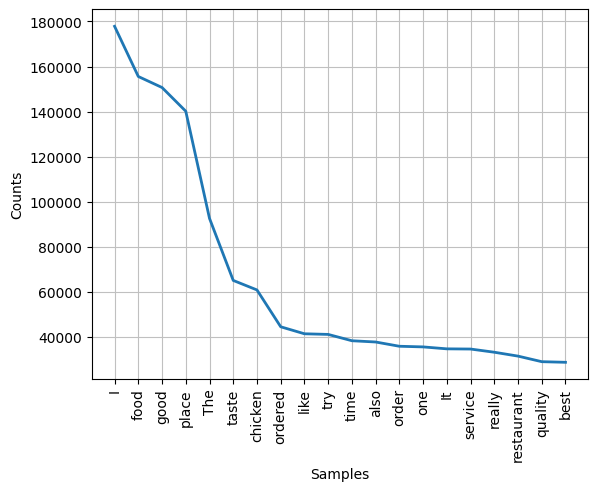

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [96]:
fd.plot(20)

In [97]:
from nltk import bigrams, trigrams, FreqDist

## Bigram Analysis

In [99]:
bi_grams = bigrams(review_1D)

In [100]:
bi_grams

<generator object bigrams at 0x000001B5291FF140>

In [101]:
fd_bi = FreqDist()
for bi_gram in bi_grams:
    fd_bi[bi_gram] = fd_bi[bi_gram] + 1

In [102]:
fd_bi.most_common(20)

[(('I', 'ordered'), 18600),
 (('must', 'try'), 9593),
 (('The', 'food'), 9277),
 (('really', 'good'), 9232),
 (('This', 'place'), 8625),
 (('I', 'would'), 7797),
 (('food', 'good'), 7615),
 (('good', 'food'), 7517),
 (('pocket', 'friendly'), 7044),
 (('taste', 'good'), 6595),
 (('I', 'tried'), 6185),
 (('also', 'good'), 6023),
 (('visit', 'place'), 5986),
 (('food', 'I'), 5870),
 (('The', 'place'), 5628),
 (('good', 'I'), 5376),
 (('xa', 'xa'), 5351),
 (('good', 'place'), 5281),
 (('value', 'money'), 5271),
 (('quality', 'food'), 5263)]

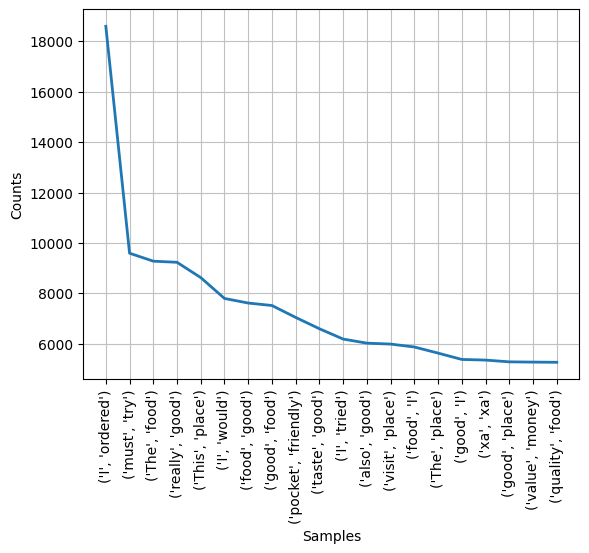

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [103]:
fd_bi.plot(20)

## Trigram Analysis

In [115]:
tri_grams = trigrams(review_1D)

In [116]:
fd_tri = FreqDist()
for tri_gram in tri_grams:
    fd_tri[tri_gram] += 1

In [117]:
fd_tri.most_common(20)

[(('xa', 'xa', 'xa'), 5059),
 (('f', 'f', 'f'), 2581),
 (('I', 'ordered', 'chicken'), 1336),
 (('North', 'Indian', 'food'), 1252),
 (('must', 'visit', 'place'), 1235),
 (('I', 'would', 'recommend'), 1173),
 (('I', 'must', 'say'), 1105),
 (('food', 'I', 'ordered'), 1048),
 (('f', 'c', 'f'), 1042),
 (('A', 'must', 'try'), 1036),
 (('north', 'Indian', 'food'), 1003),
 (('paneer', 'butter', 'masala'), 1003),
 (('A', 'good', 'place'), 1001),
 (('I', 'visited', 'place'), 957),
 (('veg', 'non', 'veg'), 947),
 (('pocket', 'friendly', 'place'), 907),
 (('like', 'home', 'made'), 885),
 (('I', 'ordered', 'food'), 843),
 (('I', 'would', 'say'), 843),
 (('A', 'must', 'visit'), 804)]

In [111]:
fd_tr = FreqDist()
for tri_gram in tri_grams:
    fd_tr[tri_gram] = fd_tr[tri_gram] + 1

In [112]:
fd_tr.most_common(20)

[(('xa', 'xa', 'xa'), 5059),
 (('f', 'f', 'f'), 2581),
 (('I', 'ordered', 'chicken'), 1336),
 (('North', 'Indian', 'food'), 1252),
 (('must', 'visit', 'place'), 1235),
 (('I', 'would', 'recommend'), 1173),
 (('I', 'must', 'say'), 1105),
 (('food', 'I', 'ordered'), 1048),
 (('f', 'c', 'f'), 1042),
 (('A', 'must', 'try'), 1036),
 (('north', 'Indian', 'food'), 1003),
 (('paneer', 'butter', 'masala'), 1003),
 (('A', 'good', 'place'), 1001),
 (('I', 'visited', 'place'), 957),
 (('veg', 'non', 'veg'), 947),
 (('pocket', 'friendly', 'place'), 907),
 (('like', 'home', 'made'), 885),
 (('I', 'ordered', 'food'), 843),
 (('I', 'would', 'say'), 843),
 (('A', 'must', 'visit'), 804)]

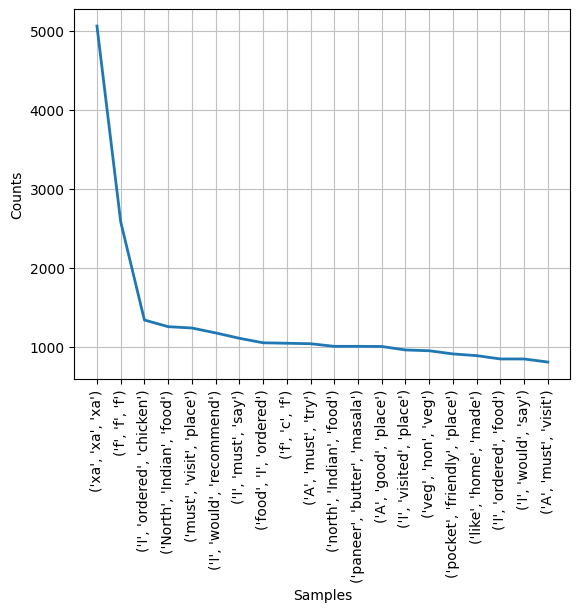

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [118]:
fd_tri.plot(20)

### Display the distinct locations in the dataframe and there are 94 distinct locations

In [120]:
df.location.unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [122]:
len(df.location.unique())

94

In [121]:
df.address

0        942, 21st Main Road, 2nd Stage, Banashankari, ...
1        2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...
2        1112, Next to KIMS Medical College, 17th Cross...
3        1st Floor, Annakuteera, 3rd Stage, Banashankar...
4        10, 3rd Floor, Lakshmi Associates, Gandhi Baza...
                               ...                        
51712    Four Points by Sheraton Bengaluru, 43/3, White...
51713    Number 10, Garudachar Palya, Mahadevapura, Whi...
51714    Sheraton Grand Bengaluru Whitefield Hotel & Co...
51715    Sheraton Grand Bengaluru Whitefield Hotel & Co...
51716    ITPL Main Road, KIADB Export Promotion Industr...
Name: address, Length: 51717, dtype: object

### Make a copy of the dataframe, so that computations applied on it will not affect the orignal dataframe

In [123]:
df_ = df.copy()

### Add the rest of the location to it. i.e country, city, state 

In [124]:
df_['location'] = df_['location'] + ' , Bangalore , Karnataka ,  India'

In [125]:
df_['location']

0            Banashankari , Bangalore , Karnataka ,  India
1            Banashankari , Bangalore , Karnataka ,  India
2            Banashankari , Bangalore , Karnataka ,  India
3            Banashankari , Bangalore , Karnataka ,  India
4            Basavanagudi , Bangalore , Karnataka ,  India
                               ...                        
51712          Whitefield , Bangalore , Karnataka ,  India
51713          Whitefield , Bangalore , Karnataka ,  India
51714          Whitefield , Bangalore , Karnataka ,  India
51715    ITPL Main Road, Whitefield , Bangalore , Karna...
51716    ITPL Main Road, Whitefield , Bangalore , Karna...
Name: location, Length: 51717, dtype: object

### Display the distinct locations in the dataframe

In [126]:
df_.location.unique()

array(['Banashankari , Bangalore , Karnataka ,  India',
       'Basavanagudi , Bangalore , Karnataka ,  India',
       'Mysore Road , Bangalore , Karnataka ,  India',
       'Jayanagar , Bangalore , Karnataka ,  India',
       'Kumaraswamy Layout , Bangalore , Karnataka ,  India',
       'Rajarajeshwari Nagar , Bangalore , Karnataka ,  India',
       'Vijay Nagar , Bangalore , Karnataka ,  India',
       'Uttarahalli , Bangalore , Karnataka ,  India',
       'JP Nagar , Bangalore , Karnataka ,  India',
       'South Bangalore , Bangalore , Karnataka ,  India',
       'City Market , Bangalore , Karnataka ,  India',
       'Nagarbhavi , Bangalore , Karnataka ,  India',
       'Bannerghatta Road , Bangalore , Karnataka ,  India',
       'BTM , Bangalore , Karnataka ,  India',
       'Kanakapura Road , Bangalore , Karnataka ,  India',
       'Bommanahalli , Bangalore , Karnataka ,  India', nan,
       'CV Raman Nagar , Bangalore , Karnataka ,  India',
       'Electronic City , Bangalore , 

### Check for missing data in the dataframes location columns and since it is small as dcompared to the entire dataframne drop it

In [128]:
df_.location.isna().sum()

21

In [133]:
df_.dropna(subset='location', inplace=True)

In [134]:
df_.location.isna().sum()

0

### This gets all the distinct locations and stores them in dataframe and changes the column name to name

In [135]:
location_df = pd.DataFrame(df_.location.unique())

In [136]:
location_df.columns = ['name']

In [137]:
location_df.head()

,name
0,"Banashankari , Bangalore , Karnataka , India"
1,"Basavanagudi , Bangalore , Karnataka , India"
2,"Mysore Road , Bangalore , Karnataka , India"
3,"Jayanagar , Bangalore , Karnataka , India"
4,"Kumaraswamy Layout , Bangalore , Karnataka , ..."


### The Nominatim is a package used to get the latitude and longitude coordinate of a place when given their string location

In [138]:
from geopy.geocoders import Nominatim

### Create an instance of the Nominatim package 

In [139]:
geolocator = Nominatim(user_agent="app", timeout=None)

### Loop through the locations and find the respectiev locations and if the location is not found eplace it with missing value

In [141]:
lat = []
long = []
for location in location_df.name:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        long.append(np.nan)
    else:
        lat.append(location.latitude)
        long.append(location.longitude)

### Create 2 new columns and add the lat and long data to it 

In [142]:
location_df['latitude'] = lat
location_df['longitude'] = long

In [143]:
location_df.head()

,name,latitude,longitude
0,"Banashankari , Bangalore , Karnataka , India",12.915221,77.573598
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.946703,77.530070
3,"Jayanagar , Bangalore , Karnataka , India",12.929273,77.582423
4,"Kumaraswamy Layout , Bangalore , Karnataka , ...",12.908149,77.555318


### Check for missing values in the dataframe and where they exist at and manually fill in all the missing values 

In [144]:
location_df.isna().sum()

name         0
latitude     2
longitude    2
dtype: int64

In [146]:
location_df[location_df.latitude.isna()]

,name,latitude,longitude
79,"Rammurthy Nagar , Bangalore , Karnataka , India",NaN,NaN
85,"Sadashiv Nagar , Bangalore , Karnataka , India",NaN,NaN


### manuelly set the latitude and longitude of the rows with missing values

In [147]:
location_df['latitude'][79] = 13.0163
location_df['latitude'][85] = 13.0068

C:\Users\THIS PC\AppData\Local\Temp\ipykernel_1204\1720577703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_df['latitude'][79] = 13.0163
C:\Users\THIS PC\AppData\Local\Temp\ipykernel_1204\1720577703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_df['latitude'][85] = 13.0068


In [148]:
location_df['longitude'][79] = 77.6785
location_df['longitude'][85] = 77.5813

C:\Users\THIS PC\AppData\Local\Temp\ipykernel_1204\3045206578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_df['longitude'][79] = 77.6785
C:\Users\THIS PC\AppData\Local\Temp\ipykernel_1204\3045206578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_df['longitude'][85] = 77.5813


In [ ]:
df_.cuisines

### There are 24 missing values in the cuisin column of the dataframe and since it is less as compared to the whole data it is dropped

In [150]:
df_.cuisines.isna().sum()

24

In [152]:
df_.dropna(subset='cuisines', inplace = True)

### Find the cuisines that contains the string North Indian in it and store it a new dataframe

In [153]:
north_india = df_[df_.cuisines.str.contains('North Indian')]

### There are 21085 rows and 18 columns in the new dataframe 

In [154]:
north_india.shape

(21085, 18)

### Find the number of times each north india location appears in our dataframe and create a dataframe with it

In [159]:
north_india_rest = north_india.location.value_counts().reset_index().rename(columns={'index':'name', 'location': 'count'})

In [160]:
north_india_rest

,name,count
0,"BTM , Bangalore , Karnataka , India",2469
1,"HSR , Bangalore , Karnataka , India",1123
2,"Whitefield , Bangalore , Karnataka , India",1059
3,"Marathahalli , Bangalore , Karnataka , India",1038
4,"JP Nagar , Bangalore , Karnataka , India",958
...,...,...
85,"Hebbal , Bangalore , Karnataka , India",4
86,"Jakkur , Bangalore , Karnataka , India",3
87,"Central Bangalore , Bangalore , Karnataka , I...",2
88,"West Bangalore , Bangalore , Karnataka , India",1


### Join the 2 dataframes and the priority on the left dataframe ie north_india_rest dataframe using the name column

In [164]:
heatmap_df = north_india_rest.merge(location_df, on='name', how='left')

In [165]:
heatmap_df

,name,count,latitude,longitude
0,"BTM , Bangalore , Karnataka , India",2469,12.911276,77.604565
1,"HSR , Bangalore , Karnataka , India",1123,12.911623,77.638862
2,"Whitefield , Bangalore , Karnataka , India",1059,12.969637,77.749745
3,"Marathahalli , Bangalore , Karnataka , India",1038,12.955257,77.698416
4,"JP Nagar , Bangalore , Karnataka , India",958,12.912264,77.590457
...,...,...,...,...
85,"Hebbal , Bangalore , Karnataka , India",4,13.038218,77.591900
86,"Jakkur , Bangalore , Karnataka , India",3,13.078474,77.606894
87,"Central Bangalore , Bangalore , Karnataka , I...",2,12.974540,77.530737
88,"West Bangalore , Bangalore , Karnataka , India",1,13.022235,77.567183


In [168]:
import folium

### Create a base map of the whole world

In [169]:
base_map = folium.Map()

In [175]:
base_map

In [171]:
from folium.plugins import HeatMap

### Plot your heatmap on the base map you created 

In [173]:
HeatMap(heatmap_df[['latitude', 'longitude', 'count']]).add_to(base_map)

In [174]:
base_map

### This function allows us to get the heatmap of a particular cuisines location by just entering the cuuisine name as a parameter

In [178]:
def get_heatmap(cuisine):
    cuisine_df = df_[df_.cuisines.str.contains(cuisine)]
    cuisine_rest = cuisine_df.location.value_counts().reset_index().rename(columns={'index':'name', 'location': 'count'})
    heatmap_df = cuisine_rest.merge(location_df, on='name', how='left')
    base_map = folium.Map()
    HeatMap(cuisine_rest[['latitude', 'longitude', 'count']]).add_to(base_map)
    return base_map